In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction import FeatureHasher

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

sns.set(style="ticks")
pd.set_option('display.max_columns', 100)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
# !pip install imbalanced-learn

# Load data

In [2]:
def memory(df):
    print("Memory usage of the dataframe is {:.2f} MB".format(
        df.memory_usage().sum() / 1024**2))

In [3]:
google_drive = False
convert = False

if(google_drive):
    from google.colab import drive
    drive.mount('/content/gdrive')
    
    df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/we_data/train.csv')
    
elif(convert):
    df = pd.read_csv('../we_data/traina.csv')
    df.to_hdf('train.h5', 'train')
    
else:
    df = pd.read_hdf('../train.h5', 'train')

In [4]:
df.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [5]:
df['adexchange'].value_counts()

3.0    819458
2.0    763428
1.0    718271
4.0     79995
Name: adexchange, dtype: int64

In [6]:
df['keypage'].value_counts()

bebefa5efe83beee17a3d245e7c5085b    492353
d29e59bf0f7f8243858b8183f14d4412    264956
361e128affece850342293213691a043    257376
0f951a030abdaedd733ee8d114ce2944    228393
43f4a37f42a7c5e6219e2601b26c6976    197665
b2e35064f3549d447edbbdfb1f707c8c    165373
a5d0bde104fea52ea466c77b37948424     97033
c8758e8658b05bc3a88af7b37bdf0575     75359
f4a09c06b67d0fcce088ee6e86ca052a     41741
9be83422522025c09a44593ecd1af8ca     31811
15b749127478946f161a54dc0dad27c8     16122
a3becb967c015e9acb5e72f22b100ef8     15903
d4fc4aa65f6670f7fea6862f27084fbc      9944
7e0e909ea89f707bc20f9585c9072081      9640
d41d8cd98f00b204e9800998ecf8427e      9040
aa4976c67db0f076c563a29f6697928b      8995
a8f8eeaae5c1e2e9924328e78d9925a5      2162
4f8e1c55abc204c2c8f1296dbc223af3      2125
Name: keypage, dtype: int64

In [7]:
# other fillna for adexchange should be considered at some point!
df = df.fillna(0)

In [8]:
memory(df)

Memory usage of the dataframe is 482.22 MB


In [9]:
df.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,0.0,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,0
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,0.0,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,0,2821,0
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,0.0,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,0.0,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,0.0,1120200150,728,90,OtherView,Na,133,7330,277,133,0,2259,0


In [10]:
df.shape

(2430981, 25)

# Problem 1

In [11]:
no_click,click = df['click'].value_counts().values
print('Baseline CTR {:.5f}'.format(click/no_click))

Baseline CTR 0.00074


In [12]:
def calcluate_num_impressions(df, grouping = False):
    imp = {}
    
    if(grouping):
        imp = df.groupby(grouping).size().to_dict()
            
    else:
        imp = len(df)
    
    print(imp)
    return imp
    


def calcluate_num_clicks(df, grouping = False):
    clicks = {}
    
    if(grouping):
        for index, group in df.groupby(grouping):
            clicks[index] = np.sum(group['click'])
            
    else:
        clicks = np.sum(df['click'])
    
    print(clicks)
    return clicks
    

def calcluate_ctr(df, grouping = False):
    ctr = {}
    
    if(grouping):
        for index, group in df.groupby(grouping):
            ctr[index] = np.average(group['click'])
            
    else:
        ctr = np.average(df['click'])
    
    print(ctr)
    return ctr
    
    
def average_cost_per_mille(df, grouping = False):
    cpm = {}
    
    if(grouping):
        cpm = df.groupby('weekday').agg({'payprice': np.mean}).to_dict()['payprice']
        
    else:
        cpm = np.mean(df['payprice'])
        
    print(cpm)
    return cpm

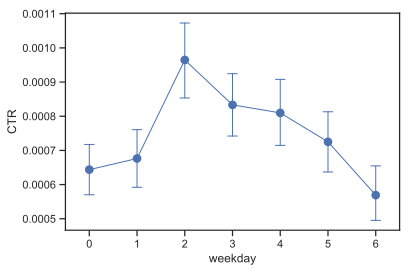

In [468]:
ax = sns.pointplot(
    x="weekday",
    y="click",
    data=df,
    estimator=np.average,
    capsize=.2)
lw = ax.lines[0].get_linewidth()
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()

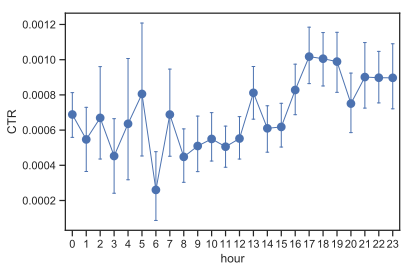

In [469]:
ax = sns.pointplot(
    x="hour",
    y="click",
    data=df,
    estimator=np.average,
    capsize=.2)
lw = ax.lines[0].get_linewidth()
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()

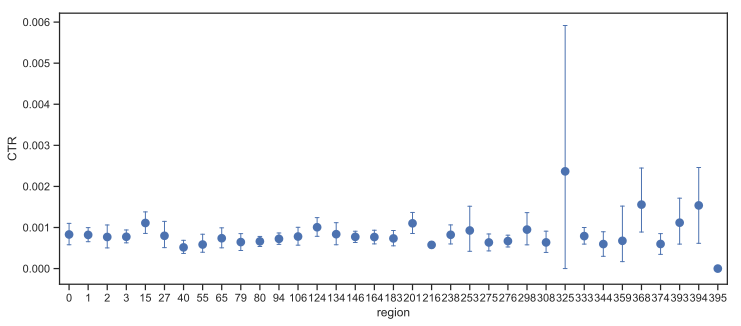

In [470]:
plt.figure(figsize=(12, 5))
ax = sns.pointplot(
    x="region",
    y="click",
    data=df,
    estimator=np.average,
    capsize=.2,
    join=False)
lw = ax.lines[0].get_linewidth()
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()

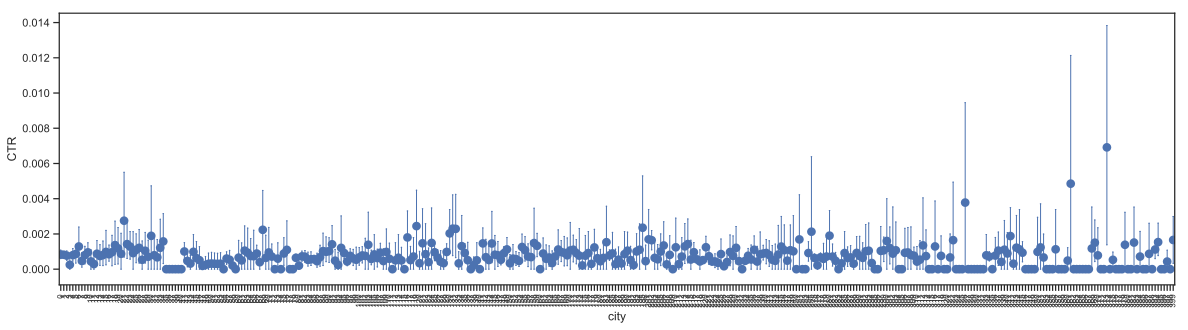

In [471]:
plt.figure(figsize=(20, 5))
ax = sns.pointplot(
    x="city",
    y="click",
    data=df,
    estimator=np.average,
    capsize=.2,
    join=False)
lw = ax.lines[0].get_linewidth()
plt.ylabel('CTR')
plt.xticks(fontsize=8, rotation=90)
plt.setp(ax.lines, linewidth=1)
plt.show()

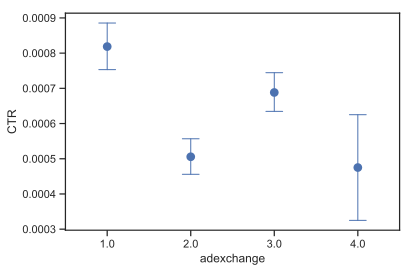

In [472]:
ax = sns.pointplot(
    x="adexchange",
    y="click",
    data=df,
    estimator=np.average,
    capsize=.2,
    join=False)
lw = ax.lines[0].get_linewidth()
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()

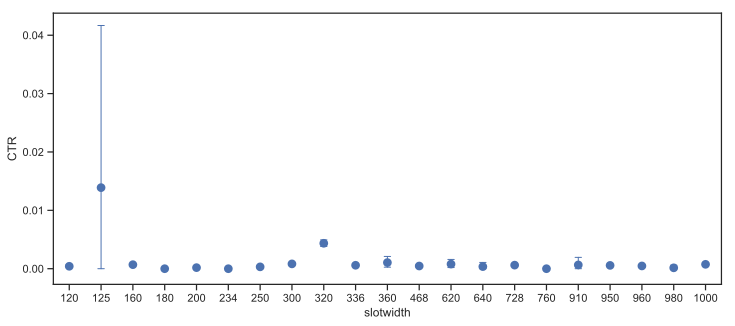

In [473]:
plt.figure(figsize=(12, 5))
ax = sns.pointplot(
    x="slotwidth",
    y="click",
    data=df,
    estimator=np.average,
    capsize=.2,
    join=False)
lw = ax.lines[0].get_linewidth()
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()

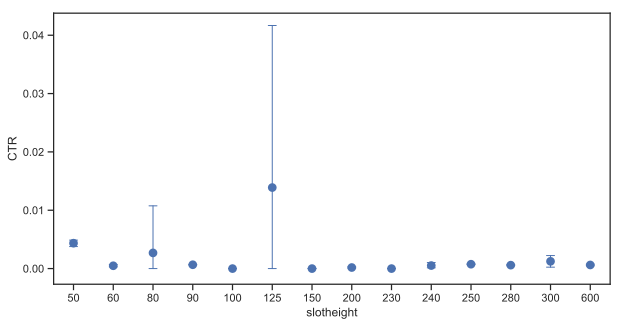

In [474]:
plt.figure(figsize=(10, 5))
ax = sns.pointplot(
    x="slotheight",
    y="click",
    data=df,
    estimator=np.average,
    capsize=.2,
    join=False)
lw = ax.lines[0].get_linewidth()
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()

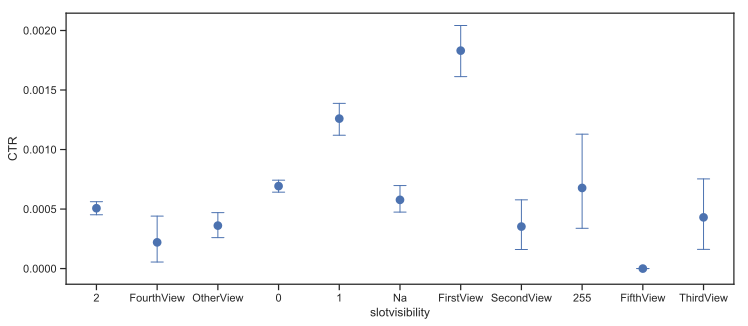

In [475]:
plt.figure(figsize=(12, 5))
ax = sns.pointplot(
    x="slotvisibility",
    y="click",
    data=df,
    estimator=np.average,
    capsize=.2,
    join=False)
lw = ax.lines[0].get_linewidth()
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()

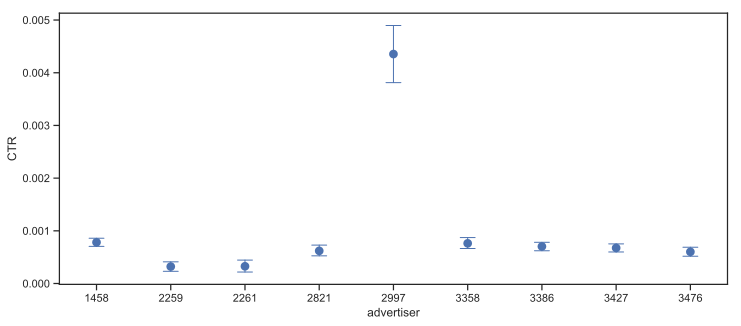

In [477]:
plt.figure(figsize=(12,5))
ax = sns.pointplot(
    x="advertiser",
    y="click",
    data=df,
    estimator=np.average,
    capsize=.2,
    join=False)
lw = ax.lines[0].get_linewidth()
plt.ylabel('CTR')
plt.setp(ax.lines, linewidth=1)
plt.show()

# Problem 2

# Problem 3

## Feature engineering

In [54]:
def count_featuresize_one_hot(df):
    """Calcualte the number of featuers nessecary for one hot encoding"""

    total_features = 0

    for column in df.columns:
        total_features += len(df[column].unique())

    print('Rougly {:,} features in the feature space'.format(total_features))

    return total_features


def feature_engineering(df):
    """ Enrich dataframe with additional features"""

    # split user agent into os and browser
    df_copy['os'], df_copy['browser'] = df_copy['useragent'].str.split('_').str

    # deterime mobile devivce or not
    df_copy['mobieldevice'] = df_copy['useragent'].str.match(
        r'(ios)|(android)').astype(np.uint8)

    # bin hours into time of day
    df_copy['timeofday'] = pd.cut(
        df['hour'], 4, labels=["night", "morning", "afternoon", "evening"])

    # calcualte total ad surface
    df_copy['adsize'] = df_copy['slotwidth'] * df_copy['slotheight']

    return df


def pre_process_one_hot_encoding(df):
    """Split the user tags and binary encode,
       and convert numerical categories into strings"""

    # convert numerical categories into strings as a quick hack for one hot encoding to work properly
    df['weekday'] = df['weekday'].astype(str)
    df['hour'] = df['hour'].astype(int)
    df['region'] = df['region'].astype(str)
    df['city'] = df['city'].astype(str)
    df['adexchange'] = df['adexchange'].astype(str)
    df['usertag'] = df['usertag'].astype(str)

    # # converting all fields to str is a quick hack for one hot encoding to work properly
    # for column in df.columns:
    #     if (column == 'click'):
    #         continue
    #     df[column] = df[column].astype(str)

    mlb = MultiLabelBinarizer()

    df = df.join(
        pd.DataFrame(
            mlb.fit_transform(df['usertag'].str.split(',')),
            columns='usertag_' + mlb.classes_,
            index=df.index))

    # drop the usertag column
    df = df.drop(columns='usertag')

    # mlb.classes_

    return df


# a, b = df['click'].value_counts()

# sns.pointplot(
#     x="stragne",
#     y="click",
#     data=df,
#     estimator=np.average,
#     capsize=.2,
#     join=False,
#     ci=False)
# lw = ax.lines[0].get_linewidth()
# plt.setp(ax.lines, linewidth=1)
# plt.axhline(b/a)
# plt.show()

## Remove columns

In [26]:
count_featuresize_one_hot(df)

Rougly 6,862,212 featurs in the feature space


6862212

In [30]:
# drop colums unavalible in test data
df = df.drop(columns=['bidprice', 'payprice'])

# unqiue or no information
df = df.drop(columns=['urlid', 'bidid'])

In [31]:
count_featuresize_one_hot(df)

Rougly 4,430,921 featurs in the feature space


4430921

## Build feature matrix

In [57]:
df = feature_engineering(df)
df = pre_process_one_hot_encoding(df)

### OPTION 1: Apply bloom filter on all filters

In [ ]:
# test_dict = df_copy.drop(columns='click').T.to_dict().values()
# h = FeatureHasher(n_features=20000)
# maxtix = h.transform(test_dict)

In [529]:
maxtix.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

### OPTION 2: Get feature matrix of select number of features

In [64]:
# remove some very sparse fields to reduce featuers
df = df.drop(columns=['userid', 'url', 'domain', 'slotid', 'IP'])

# create matrix
matrix = pd.get_dummies(df.loc[:400000])



## Balance dataset

There is a significant unbalance between the click and the non-click class. In an attempt to increase numerical stability of the training models the majority class will be under sampled (observations will be removed) and the minority class will be oversampled generating new samples. Considering a sample x_i, a new sample x_{new} will be generated considering its k neareast-neighbors. 

SMOTEENN Combines over and under sampling

In [65]:
matrix['click'].value_counts()

0    399711
1       290
Name: click, dtype: int64

In [83]:
from imblearn.combine import SMOTEENN

In [ ]:
smote_enn = SMOTEENN(random_state=0)

y = matrix['click'].values
X = matrix[matrix.columns[1:]].values


X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# lr = LogisticRegression(solver='lbfgs')
# scores = cross_val_score(lr, X, y, cv=2) #error_score='f1',
# print("Average accuracy: {:.%} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))